# Data Analysis and Data Science
## Be curious about the method 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 4th, 2023

<hr style="border:1px solid black"> </hr>

In [24]:
### Student Name: Emmanuelle Del Guidice

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 5th, noon to hand-in your Notebook.

In [25]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Genes correlation [25 pts]

In [27]:
### Import and clean the Gene expression cancer 1 dataset
data = pd.read_csv("/u/delguide/data_analysis/code_github/datasets/gene_expression_cancer_1.csv", sep=",", header=0)
data.tail()

,ESR1,PGR,BCL2,NAT1,Results
145,6.7,3.0,5.2,2.3,Dead
146,6.3,2.5,5.0,1.9,Dead
147,6.5,3.0,5.2,2.0,Dead
148,6.2,3.4,5.4,2.3,Dead
149,5.9,3.0,5.1,1.8,Dead


### Global correlation [6 pts]

Comparing the expression profile of the PGR and ESR1 genes:
Peason correlation coefficient\: -0.109
At first glance, expression of PGR and ESR1 do not seem to correlate linearly. The Pearson coefficient and is very close to zero.


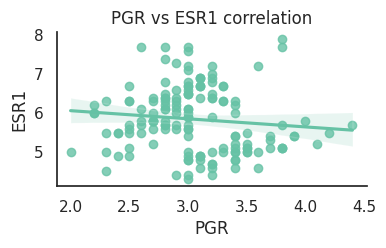

In [28]:
### Consider the PGR and ESR1 genes. Do the expression of these two genes correlates?
### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.

print("Comparing the expression profile of the PGR and ESR1 genes:")

## Do a linear regression and look at the Pearson coefficient
reg = sp.stats.linregress(x=data.PGR, y=data.ESR1, alternative='two-sided')
print("Peason correlation coefficient\:", round(reg.rvalue, 3))

### Answer the question with a Pearson correlation coefficient, a plot and brief interpretation of your results.

## Plot

p = sns.regplot(data, x="PGR", y="ESR1")
p.set_title("PGR vs ESR1 correlation")
sns.despine()

### Consider the entire dataset.

# Brief interpretation
print("At first glance, expression of PGR and ESR1 do not seem to correlate linearly. The Pearson coefficient and is very close to zero.")

### Grouped correlations [14 pts]

### Spearman's rank correlation [5 pts]

Pearson coef: 0.747


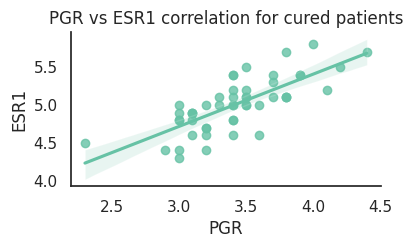

Pearson coef: 0.528


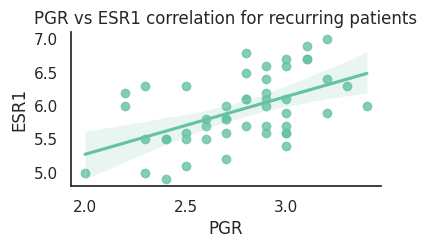

Pearson coef: 0.462


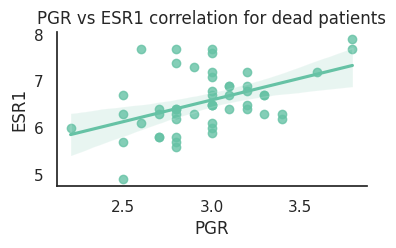

Interpretation: 
There is no linear correlation between the expression of PGR and ESR1 when considering the whole dataset (Pearson coefficient close to zero.
We can find a positive linear correlation between the two genes when we separate the data by clinical outcome, as seen on the plots and the Pearson coefficients.
The correlation is strongest for cured patients, and weakest for dead patients.
We can hypothesize that PGR and ESR1 expression correlates but their overall levels are influenced by other factors contributing to clinical outcome.


In [29]:
### Consider the same two genes, but assess correlation based on the patient outcomes (a.k.a "Results").
### For each group, return a Pearson correlation coefficient and a plot.
### (You can generate a single plot with all three groups or three individual plots)
### Briefly interpret your results and state if your conclusion differ from the one previously made (Global correlation).

# Plot

import matplotlib.pyplot as plt

# Cured patients
reg = sp.stats.linregress(x=data.loc[data.Results == 'Cured', 'PGR'], y=data.loc[data.Results == 'Cured', 'ESR1'], alternative='two-sided')
plt.figure()
p = sns.regplot(data, x=data.loc[data.Results == 'Cured', 'PGR'], y=data.loc[data.Results == 'Cured', 'ESR1'])
print("Pearson coef:", round(reg.rvalue, 3))
p.set_title("PGR vs ESR1 correlation for cured patients")
sns.despine()
plt.show()

# Recurring patients
reg = sp.stats.linregress(x=data.loc[data.Results == 'Recurrence', 'PGR'], y=data.loc[data.Results == 'Recurrence', 'ESR1'], alternative='two-sided')
plt.figure()
p = sns.regplot(data, x=data.loc[data.Results == 'Recurrence', 'PGR'], y=data.loc[data.Results == 'Recurrence', 'ESR1'])
print("Pearson coef:", round(reg.rvalue, 3))
p.set_title("PGR vs ESR1 correlation for recurring patients")
sns.despine()
plt.show()

# Dead patients
reg = sp.stats.linregress(x=data.loc[data.Results == 'Dead', 'PGR'], y=data.loc[data.Results == 'Dead', 'ESR1'], alternative='two-sided')
plt.figure()
p = sns.regplot(data, x=data.loc[data.Results == 'Dead', 'PGR'], y=data.loc[data.Results == 'Dead', 'ESR1'])
print("Pearson coef:", round(reg.rvalue, 3))
p.set_title("PGR vs ESR1 correlation for dead patients")
sns.despine()
plt.show()

print("Interpretation: \nThere is no linear correlation between the expression of PGR and ESR1 when considering the whole dataset (Pearson coefficient close to zero.")
print("We can find a positive linear correlation between the two genes when we separate the data by clinical outcome, as seen on the plots and the Pearson coefficients.")
print("The correlation is strongest for cured patients, and weakest for dead patients.")
print("We can hypothesize that PGR and ESR1 expression correlates but their overall levels are influenced by other factors contributing to clinical outcome.")

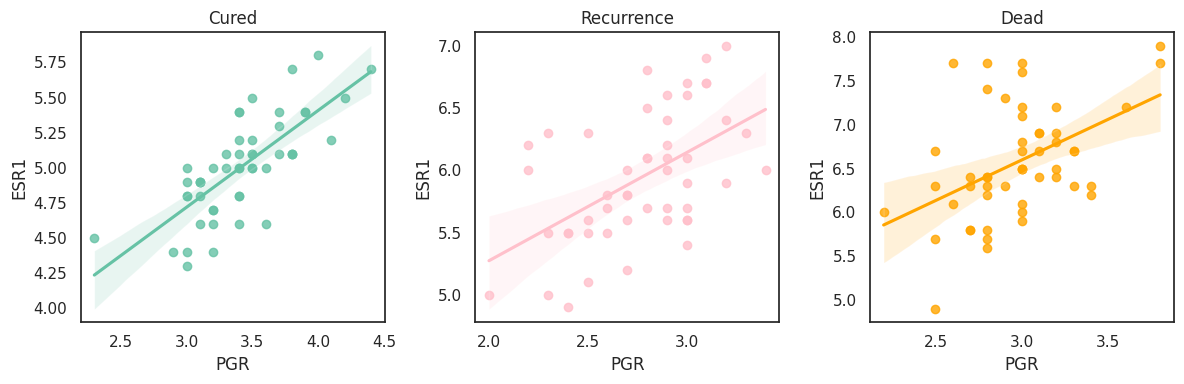

In [30]:
# Alternative figure

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
#fig.set_title("PGR vs ESR1 correlation w/ rvalue for cured patients")
                        
# Plot the first regression line
sns.regplot(x=data.loc[data.Results == 'Cured', 'PGR'], y=data.loc[data.Results == 'Cured', 'ESR1'], label='Cured', ax=axs[0])
axs[0].set_title('Cured')

# Plot the second regression line
sns.regplot(x=data.loc[data.Results == 'Recurrence', 'PGR'], y=data.loc[data.Results == 'Recurrence', 'ESR1'], label='Recurring', color='pink', ax=axs[1])
axs[1].set_title('Recurrence')

# Plot the third regression line
sns.regplot(x=data.loc[data.Results == 'Dead', 'PGR'], y=data.loc[data.Results == 'Dead', 'ESR1'], label='Dead', color='orange', ax=axs[2])
axs[2].set_title('Dead')

# Add labels and title
for ax in axs:
    ax.set_xlabel('PGR')
    ax.set_ylabel('ESR1')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Pearson coefficients:

Cured: 0.747
Recurrence: 0.528
Dead: 0.462


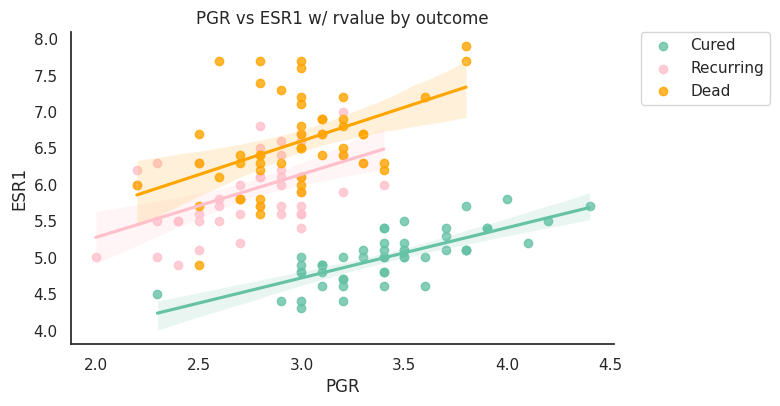

In [31]:
# Alternative figure (best one)

# Create a figure and axis
p = plt.figure(figsize=(8, 4))

# Plot the first regression line
p = sns.regplot(x=data.loc[data.Results == 'Cured', 'PGR'], y=data.loc[data.Results == 'Cured', 'ESR1'], label='Cured')

# Plot the second regression line
p = sns.regplot(x=data.loc[data.Results == 'Recurrence', 'PGR'], y=data.loc[data.Results == 'Recurrence', 'ESR1'], label='Recurring', color='pink')

# Plot the third regression line
p = sns.regplot(x=data.loc[data.Results == 'Dead', 'PGR'], y=data.loc[data.Results == 'Dead', 'ESR1'], label='Dead', color='orange')

# Add a legend
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend
legend = plt.tight_layout()


# Add labels and title
plt.xlabel('PGR')
plt.ylabel('ESR1')
plt.title('PGR vs ESR1 w/ rvalue by outcome')

# Despine
sns.despine()

# Pearson coefficients
print("Pearson coefficients:\n")

reg = sp.stats.linregress(x=data.loc[data.Results == 'Cured', 'PGR'], y=data.loc[data.Results == 'Cured', 'ESR1'], alternative='two-sided')
print("Cured:", round(reg.rvalue, 3))

reg = sp.stats.linregress(x=data.loc[data.Results == 'Recurrence', 'PGR'], y=data.loc[data.Results == 'Recurrence', 'ESR1'], alternative='two-sided')
print("Recurrence:", round(reg.rvalue, 3))

reg = sp.stats.linregress(x=data.loc[data.Results == 'Dead', 'PGR'], y=data.loc[data.Results == 'Dead', 'ESR1'], alternative='two-sided')
print("Dead:", round(reg.rvalue, 3))

In [32]:
### Calculate the Spearman' rank correlations for the four comparisons made previously.
### (Global dataset and the three goups)
### Do the results differ? if so, do the conlusions also differ? 
### Briefly explain what are the new conclusions.

## Calculate the Spearman's rank coefficient between PGR and ESR1

print("Spearman correlations:")
speaR = sp.stats.spearmanr(data.PGR, data.ESR1)
print("Global:", round(speaR.statistic, 3))
speaR = sp.stats.spearmanr(data.loc[data.Results == 'Cured', 'PGR'], data.loc[data.Results == 'Cured', 'ESR1'])
print("Cured:", round(speaR.statistic, 3))
speaR = sp.stats.spearmanr(data.loc[data.Results == 'Recurrence', 'PGR'], data.loc[data.Results == 'Recurrence', 'ESR1'])
print("Recurrence:", round(speaR.statistic, 3))
speaR = sp.stats.spearmanr(data.loc[data.Results == 'Dead', 'PGR'], data.loc[data.Results == 'Dead', 'ESR1'])
print("Dead:", round(speaR.statistic, 3))

print("\nInterpretation:")
print("The Spearman coefficient for the global dataset comparing PGR and ESR1 expression does not indicate a monotonic relationship between the two variables.")
print("However, when the results are divided by clinical outcome, a positive monotonic relationship can be observed within the three groups.")
print("The correlation is the strongest for cured patients and the weakest for dead patients.")
print("Again, we can hypothesize that PGR and ESR1 expression correlates but their overall levels are influenced by other factors contributing to clinical outcome.")

Spearman correlations:
Global: -0.159
Cured: 0.769
Recurrence: 0.518
Dead: 0.439

Interpretation:
The Spearman coefficient for the global dataset comparing PGR and ESR1 expression does not indicate a monotonic relationship between the two variables.
However, when the results are divided by clinical outcome, a positive monotonic relationship can be observed within the three groups.
The correlation is the strongest for cured patients and the weakest for dead patients.
Again, we can hypothesize that PGR and ESR1 expression correlates but their overall levels are influenced by other factors contributing to clinical outcome.
